# Módulos a usar

In [60]:
import pandas as pd
import numpy as np
from  skimage.io import imread, imshow
import pywt
import pywt.data

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 2)

# Agglomerative Clustering Algorithm
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# cargando la data clases
path=r'/content/drive/MyDrive/Proyecto_3_Clustering/DataSet_20221029T011528Z_001/DataSet/'
dfclases = pd.read_csv(path + "clase.txt")

# contando los valores presentes en las clases
dfclases.x.value_counts()

kidney         39
cerebellum     38
colon          34
hippocampus    31
liver          26
endometrium    15
placenta        6
Name: x, dtype: int64

In [63]:
# ordenando la tabla df_clases
dfclases["concated_name"] = dfclases["Unnamed: 0"].astype(str) + "_" + dfclases["x"]
list_names = list(dfclases["concated_name"])

In [123]:
# cargando la informacion genetetica
df = pd.read_csv(path + "dataset_tissue.txt")
df = df.iloc[:,1:]  
# renmbrando las columnas
df.columns = list_names
# transponiendo el dataframe
dft = df.T
dft

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22175,22176,22177,22178,22179,22180,22181,22182,22183,22184,22185,22186,22187,22188,22189,22190,22191,22192,22193,22194,22195,22196,22197,22198,22199,22200,22201,22202,22203,22204,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214
1_kidney,10.19,6.04,7.45,12.03,5.27,8.54,6.92,5.72,8.08,5.43,7.04,8.85,7.60,11.25,10.29,8.89,6.37,5.58,10.14,5.96,9.74,11.05,12.28,12.85,12.30,11.34,12.00,12.27,7.61,11.54,12.26,10.40,13.23,12.69,10.90,11.94,13.03,12.64,13.09,12.72,...,5.38,6.24,8.61,9.02,8.27,7.32,8.79,6.54,10.56,6.88,9.97,8.02,5.36,9.03,8.11,4.55,10.00,10.68,6.89,7.39,7.77,8.96,6.65,7.94,8.41,4.86,8.53,8.15,7.46,9.82,8.11,5.25,7.10,8.21,7.74,6.43,5.70,9.21,8.34,7.37
2_kidney,10.51,6.70,7.78,12.01,5.18,8.59,6.96,5.60,7.57,5.28,7.05,8.50,7.47,10.86,10.45,9.66,6.50,5.49,10.26,6.53,10.19,11.95,12.78,13.39,12.05,10.99,11.79,11.63,9.37,11.74,12.50,10.38,13.02,12.98,10.83,11.76,12.79,12.48,13.03,12.35,...,5.36,6.42,8.05,9.15,8.17,8.04,8.90,6.46,11.01,6.97,10.18,9.21,5.36,8.99,8.55,4.74,10.15,10.65,7.07,7.14,7.99,8.69,6.76,8.24,8.80,5.01,9.23,8.15,7.93,10.18,8.07,5.41,6.91,8.32,8.19,7.68,6.57,9.42,8.21,7.92
3_kidney,10.27,6.14,7.70,11.63,5.30,8.28,7.05,5.58,7.14,5.28,7.33,9.29,7.87,11.03,10.45,8.63,6.42,5.62,10.67,6.78,10.01,11.63,12.15,12.20,12.21,10.62,11.91,12.36,9.62,11.51,12.29,10.38,13.25,12.52,10.51,11.28,12.90,12.67,12.94,12.21,...,5.27,5.90,9.22,9.13,8.62,6.64,9.25,6.33,10.93,6.50,10.22,8.03,5.29,9.28,6.75,4.61,10.38,10.80,7.20,7.39,7.48,8.67,6.31,7.49,7.91,5.08,9.19,8.55,8.18,10.26,7.81,5.30,6.72,8.40,7.96,6.42,5.64,8.19,8.46,7.60
4_kidney,10.25,6.58,8.48,11.08,5.37,8.60,7.12,5.86,8.61,5.38,7.57,9.02,7.89,11.24,10.46,10.02,6.74,5.53,10.46,6.39,10.34,11.32,12.79,12.87,12.01,11.03,11.57,12.30,9.99,11.89,12.64,9.77,13.40,12.85,11.02,11.75,13.03,12.64,13.16,12.88,...,5.09,6.12,9.21,9.55,8.66,7.30,9.57,6.12,11.06,6.25,10.31,8.51,5.40,9.49,6.80,4.65,10.80,11.07,7.89,7.29,7.92,9.30,6.26,7.75,8.99,5.03,9.22,9.17,9.62,10.01,8.04,6.03,6.72,8.80,8.33,6.35,5.75,8.52,8.56,7.80
5_kidney,10.16,6.61,8.12,10.83,5.33,8.30,7.08,5.73,8.97,5.48,7.26,8.86,7.79,10.97,10.26,9.63,6.63,5.44,10.25,6.33,9.83,11.19,12.69,12.65,11.97,10.99,11.75,12.06,9.07,11.89,12.72,10.00,13.47,12.96,10.93,11.46,12.99,12.60,13.20,12.73,...,5.31,6.09,8.93,9.94,8.43,7.63,9.03,6.43,10.94,6.45,9.97,8.02,5.33,9.30,6.84,4.57,10.54,10.96,7.73,7.07,7.78,8.96,6.44,7.83,8.71,4.97,8.96,8.32,9.43,9.95,8.21,5.61,6.58,8.58,8.06,6.44,6.05,7.97,8.42,7.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185_placenta,9.80,6.06,7.49,9.91,5.31,7.42,6.91,5.78,6.55,5.44,6.91,8.26,7.53,9.44,10.13,8.61,6.19,5.22,9.54,5.46,9.05,9.25,12.28,11.61,12.73,11.20,11.82,12.02,10.77,12.19,12.66,10.02,13.10,12.62,11.37,11.82,12.97,12.36,13.21,12.22,...,5.44,6.21,8.16,8.85,7.47,7.18,8.95,6.32,10.77,6.32,9.52,7.00,5.45,9.20,5.81,4.57,9.75,10.40,7.11,7.05,7.74,8.96,6.52,8.18,5.95,5.22,8.70,8.28,6.92,9.87,7.10,5.36,7.10,7.97,6.79,6.22,7.33,8.45,8.34,7.66
186_placenta,10.51,6.35,7.47,9.91,5.34,7.90,6.98,6.00,6.78,5.37,9.38,9.22,7.64,9.84,11.68,8.66,6.80,5.37,10.26,6.91,10.32,11.29,12.17,12.35,12.60,10.81,11.28,11.87,10.45,11.74,12.32,10.85,12.98,12.15,10.86,11.40,12.83,12.32,13.13,11.75,...,5.21,6.06,8.79,9.24,7.47,7.05,8.59,6.15,11.03,6.24,9.85,8.76,5.43,9.17,6.19,4.60,10.00,10.64,7.18,6.90,7.83,9.09,6.65,7.47,5.87,5.02,8.74,8.72,6.93,10.42,7.06,5.43,7.05,7.16,7.92,6.42,10.26,9.30,8.26,8.07
187_placenta,9.98,6.72,7.12,9.41,4.90,8.12,6.81,5.97,6.58,5.42,10.23,9.57,7.52,9.37,9.91,8.89,6.75,5.78,9.98,9.40,10.86,10.70,12.51,13.24,12.18,11.13,11.62,11.65,10.77,11.88,12.42,10.20,13.06,12.80,10.98,11.80,12.61,12.11,13.20,12

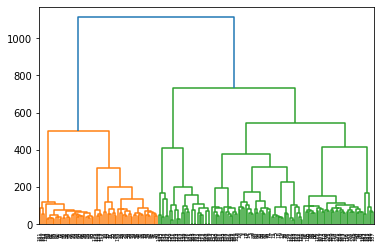

In [124]:
# hallando el dondograma
dendrogram = sch.dendrogram(sch.linkage(dft, method='ward'))
plt.show()

In [125]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(dft)
labels = model.labels_

In [126]:
dft

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22175,22176,22177,22178,22179,22180,22181,22182,22183,22184,22185,22186,22187,22188,22189,22190,22191,22192,22193,22194,22195,22196,22197,22198,22199,22200,22201,22202,22203,22204,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214
1_kidney,10.19,6.04,7.45,12.03,5.27,8.54,6.92,5.72,8.08,5.43,7.04,8.85,7.60,11.25,10.29,8.89,6.37,5.58,10.14,5.96,9.74,11.05,12.28,12.85,12.30,11.34,12.00,12.27,7.61,11.54,12.26,10.40,13.23,12.69,10.90,11.94,13.03,12.64,13.09,12.72,...,5.38,6.24,8.61,9.02,8.27,7.32,8.79,6.54,10.56,6.88,9.97,8.02,5.36,9.03,8.11,4.55,10.00,10.68,6.89,7.39,7.77,8.96,6.65,7.94,8.41,4.86,8.53,8.15,7.46,9.82,8.11,5.25,7.10,8.21,7.74,6.43,5.70,9.21,8.34,7.37
2_kidney,10.51,6.70,7.78,12.01,5.18,8.59,6.96,5.60,7.57,5.28,7.05,8.50,7.47,10.86,10.45,9.66,6.50,5.49,10.26,6.53,10.19,11.95,12.78,13.39,12.05,10.99,11.79,11.63,9.37,11.74,12.50,10.38,13.02,12.98,10.83,11.76,12.79,12.48,13.03,12.35,...,5.36,6.42,8.05,9.15,8.17,8.04,8.90,6.46,11.01,6.97,10.18,9.21,5.36,8.99,8.55,4.74,10.15,10.65,7.07,7.14,7.99,8.69,6.76,8.24,8.80,5.01,9.23,8.15,7.93,10.18,8.07,5.41,6.91,8.32,8.19,7.68,6.57,9.42,8.21,7.92
3_kidney,10.27,6.14,7.70,11.63,5.30,8.28,7.05,5.58,7.14,5.28,7.33,9.29,7.87,11.03,10.45,8.63,6.42,5.62,10.67,6.78,10.01,11.63,12.15,12.20,12.21,10.62,11.91,12.36,9.62,11.51,12.29,10.38,13.25,12.52,10.51,11.28,12.90,12.67,12.94,12.21,...,5.27,5.90,9.22,9.13,8.62,6.64,9.25,6.33,10.93,6.50,10.22,8.03,5.29,9.28,6.75,4.61,10.38,10.80,7.20,7.39,7.48,8.67,6.31,7.49,7.91,5.08,9.19,8.55,8.18,10.26,7.81,5.30,6.72,8.40,7.96,6.42,5.64,8.19,8.46,7.60
4_kidney,10.25,6.58,8.48,11.08,5.37,8.60,7.12,5.86,8.61,5.38,7.57,9.02,7.89,11.24,10.46,10.02,6.74,5.53,10.46,6.39,10.34,11.32,12.79,12.87,12.01,11.03,11.57,12.30,9.99,11.89,12.64,9.77,13.40,12.85,11.02,11.75,13.03,12.64,13.16,12.88,...,5.09,6.12,9.21,9.55,8.66,7.30,9.57,6.12,11.06,6.25,10.31,8.51,5.40,9.49,6.80,4.65,10.80,11.07,7.89,7.29,7.92,9.30,6.26,7.75,8.99,5.03,9.22,9.17,9.62,10.01,8.04,6.03,6.72,8.80,8.33,6.35,5.75,8.52,8.56,7.80
5_kidney,10.16,6.61,8.12,10.83,5.33,8.30,7.08,5.73,8.97,5.48,7.26,8.86,7.79,10.97,10.26,9.63,6.63,5.44,10.25,6.33,9.83,11.19,12.69,12.65,11.97,10.99,11.75,12.06,9.07,11.89,12.72,10.00,13.47,12.96,10.93,11.46,12.99,12.60,13.20,12.73,...,5.31,6.09,8.93,9.94,8.43,7.63,9.03,6.43,10.94,6.45,9.97,8.02,5.33,9.30,6.84,4.57,10.54,10.96,7.73,7.07,7.78,8.96,6.44,7.83,8.71,4.97,8.96,8.32,9.43,9.95,8.21,5.61,6.58,8.58,8.06,6.44,6.05,7.97,8.42,7.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185_placenta,9.80,6.06,7.49,9.91,5.31,7.42,6.91,5.78,6.55,5.44,6.91,8.26,7.53,9.44,10.13,8.61,6.19,5.22,9.54,5.46,9.05,9.25,12.28,11.61,12.73,11.20,11.82,12.02,10.77,12.19,12.66,10.02,13.10,12.62,11.37,11.82,12.97,12.36,13.21,12.22,...,5.44,6.21,8.16,8.85,7.47,7.18,8.95,6.32,10.77,6.32,9.52,7.00,5.45,9.20,5.81,4.57,9.75,10.40,7.11,7.05,7.74,8.96,6.52,8.18,5.95,5.22,8.70,8.28,6.92,9.87,7.10,5.36,7.10,7.97,6.79,6.22,7.33,8.45,8.34,7.66
186_placenta,10.51,6.35,7.47,9.91,5.34,7.90,6.98,6.00,6.78,5.37,9.38,9.22,7.64,9.84,11.68,8.66,6.80,5.37,10.26,6.91,10.32,11.29,12.17,12.35,12.60,10.81,11.28,11.87,10.45,11.74,12.32,10.85,12.98,12.15,10.86,11.40,12.83,12.32,13.13,11.75,...,5.21,6.06,8.79,9.24,7.47,7.05,8.59,6.15,11.03,6.24,9.85,8.76,5.43,9.17,6.19,4.60,10.00,10.64,7.18,6.90,7.83,9.09,6.65,7.47,5.87,5.02,8.74,8.72,6.93,10.42,7.06,5.43,7.05,7.16,7.92,6.42,10.26,9.30,8.26,8.07
187_placenta,9.98,6.72,7.12,9.41,4.90,8.12,6.81,5.97,6.58,5.42,10.23,9.57,7.52,9.37,9.91,8.89,6.75,5.78,9.98,9.40,10.86,10.70,12.51,13.24,12.18,11.13,11.62,11.65,10.77,11.88,12.42,10.20,13.06,12.80,10.98,11.80,12.61,12.11,13.20,12

In [127]:
dft['labels'] = labels
dft['origin'] = dft.index
dft['origin'] = dft.origin.str.split(pat='_',expand=True).iloc[:,1]

In [128]:
dft

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22177,22178,22179,22180,22181,22182,22183,22184,22185,22186,22187,22188,22189,22190,22191,22192,22193,22194,22195,22196,22197,22198,22199,22200,22201,22202,22203,22204,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214,labels,origin
1_kidney,10.19,6.04,7.45,12.03,5.27,8.54,6.92,5.72,8.08,5.43,7.04,8.85,7.60,11.25,10.29,8.89,6.37,5.58,10.14,5.96,9.74,11.05,12.28,12.85,12.30,11.34,12.00,12.27,7.61,11.54,12.26,10.40,13.23,12.69,10.90,11.94,13.03,12.64,13.09,12.72,...,8.61,9.02,8.27,7.32,8.79,6.54,10.56,6.88,9.97,8.02,5.36,9.03,8.11,4.55,10.00,10.68,6.89,7.39,7.77,8.96,6.65,7.94,8.41,4.86,8.53,8.15,7.46,9.82,8.11,5.25,7.10,8.21,7.74,6.43,5.70,9.21,8.34,7.37,1,kidney
2_kidney,10.51,6.70,7.78,12.01,5.18,8.59,6.96,5.60,7.57,5.28,7.05,8.50,7.47,10.86,10.45,9.66,6.50,5.49,10.26,6.53,10.19,11.95,12.78,13.39,12.05,10.99,11.79,11.63,9.37,11.74,12.50,10.38,13.02,12.98,10.83,11.76,12.79,12.48,13.03,12.35,...,8.05,9.15,8.17,8.04,8.90,6.46,11.01,6.97,10.18,9.21,5.36,8.99,8.55,4.74,10.15,10.65,7.07,7.14,7.99,8.69,6.76,8.24,8.80,5.01,9.23,8.15,7.93,10.18,8.07,5.41,6.91,8.32,8.19,7.68,6.57,9.42,8.21,7.92,1,kidney
3_kidney,10.27,6.14,7.70,11.63,5.30,8.28,7.05,5.58,7.14,5.28,7.33,9.29,7.87,11.03,10.45,8.63,6.42,5.62,10.67,6.78,10.01,11.63,12.15,12.20,12.21,10.62,11.91,12.36,9.62,11.51,12.29,10.38,13.25,12.52,10.51,11.28,12.90,12.67,12.94,12.21,...,9.22,9.13,8.62,6.64,9.25,6.33,10.93,6.50,10.22,8.03,5.29,9.28,6.75,4.61,10.38,10.80,7.20,7.39,7.48,8.67,6.31,7.49,7.91,5.08,9.19,8.55,8.18,10.26,7.81,5.30,6.72,8.40,7.96,6.42,5.64,8.19,8.46,7.60,1,kidney
4_kidney,10.25,6.58,8.48,11.08,5.37,8.60,7.12,5.86,8.61,5.38,7.57,9.02,7.89,11.24,10.46,10.02,6.74,5.53,10.46,6.39,10.34,11.32,12.79,12.87,12.01,11.03,11.57,12.30,9.99,11.89,12.64,9.77,13.40,12.85,11.02,11.75,13.03,12.64,13.16,12.88,...,9.21,9.55,8.66,7.30,9.57,6.12,11.06,6.25,10.31,8.51,5.40,9.49,6.80,4.65,10.80,11.07,7.89,7.29,7.92,9.30,6.26,7.75,8.99,5.03,9.22,9.17,9.62,10.01,8.04,6.03,6.72,8.80,8.33,6.35,5.75,8.52,8.56,7.80,1,kidney
5_kidney,10.16,6.61,8.12,10.83,5.33,8.30,7.08,5.73,8.97,5.48,7.26,8.86,7.79,10.97,10.26,9.63,6.63,5.44,10.25,6.33,9.83,11.19,12.69,12.65,11.97,10.99,11.75,12.06,9.07,11.89,12.72,10.00,13.47,12.96,10.93,11.46,12.99,12.60,13.20,12.73,...,8.93,9.94,8.43,7.63,9.03,6.43,10.94,6.45,9.97,8.02,5.33,9.30,6.84,4.57,10.54,10.96,7.73,7.07,7.78,8.96,6.44,7.83,8.71,4.97,8.96,8.32,9.43,9.95,8.21,5.61,6.58,8.58,8.06,6.44,6.05,7.97,8.42,7.54,1,kidney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185_placenta,9.80,6.06,7.49,9.91,5.31,7.42,6.91,5.78,6.55,5.44,6.91,8.26,7.53,9.44,10.13,8.61,6.19,5.22,9.54,5.46,9.05,9.25,12.28,11.61,12.73,11.20,11.82,12.02,10.77,12.19,12.66,10.02,13.10,12.62,11.37,11.82,12.97,12.36,13.21,12.22,...,8.16,8.85,7.47,7.18,8.95,6.32,10.77,6.32,9.52,7.00,5.45,9.20,5.81,4.57,9.75,10.40,7.11,7.05,7.74,8.96,6.52,8.18,5.95,5.22,8.70,8.28,6.92,9.87,7.10,5.36,7.10,7.97,6.79,6.22,7.33,8.45,8.34,7.66,0,placenta
186_placenta,10.51,6.35,7.47,9.91,5.34,7.90,6.98,6.00,6.78,5.37,9.38,9.22,7.64,9.84,11.68,8.66,6.80,5.37,10.26,6.91,10.32,11.29,12.17,12.35,12.60,10.81,11.28,11.87,10.45,11.74,12.32,10.85,12.98,12.15,10.86,11.40,12.83,12.32,13.13,11.75,...,8.79,9.24,7.47,7.05,8.59,6.15,11.03,6.24,9.85,8.76,5.43,9.17,6.19,4.60,10.00,10.64,7.18,6.90,7.83,9.09,6.65,7.47,5.87,5.02,8.74,8.72,6.93,10.42,7.06,5.43,7.05,7.16,7.92,6.42,10.26,9.30,8.26,8.07,0,placenta
187_placenta,9.98,6.72,7.12,9.41,4.90,8.12,6.81,5.97,6.58,5.42,10.23,9.57,7.52,9.37,9.91,8.89,6.75,5.78,9.98,9.40,10.86,10.70,12.51,13.24,12.18,11.13,11.62,11.65,10.77,11.88,12.42,10.20,13.06,12.80,10.98,11.80,12.61,12.11,13.20,12.

In [129]:
dft.groupby(['origin','labels'])['origin','labels'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


origin  labels
origin      labels                
cerebellum  2            2       2
            3            5       5
            4           31      31
colon       0           34      34
endometrium 1           15      15
hippocampus 3           31      31
kidney      1           37      37
            2            2       2
liver       2           26      26
placenta    0            6       6

In [130]:
dft.groupby(['origin'])['origin'].count()

origin
cerebellum     38
colon          34
endometrium    15
hippocampus    31
kidney         39
liver          26
placenta        6
Name: origin, dtype: int64

In [131]:
result = dft.iloc[:,[22215,22216]].reset_index(drop=True)
result


,labels,origin
0,1,kidney
1,1,kidney
2,1,kidney
3,1,kidney
4,1,kidney
...,...,...
184,0,placenta
185,0,placenta
186,0,placenta
187,0,placenta


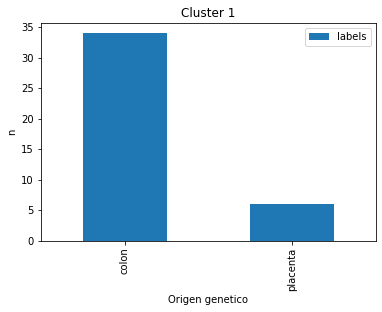

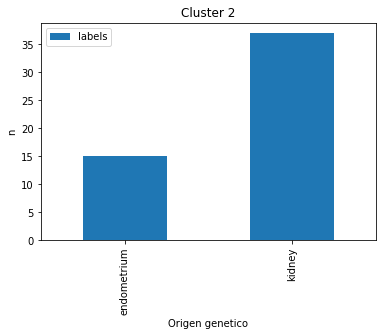

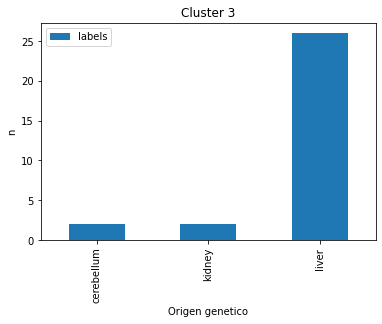

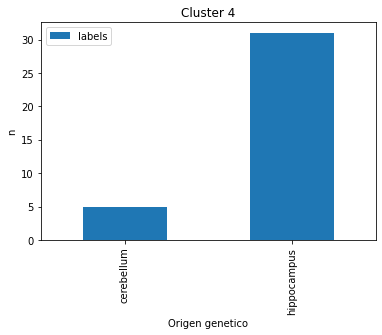

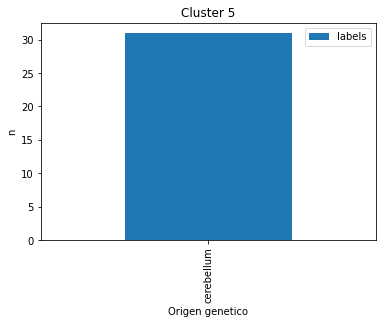

In [133]:
#cluster 1:
result[result['labels']==0].groupby('origin').count().plot(kind = 'bar')
plt.title("Cluster 1")
plt.xlabel("Origen genetico")
plt.ylabel("n")

#cluster 2:
result[result['labels']==1].groupby('origin').count().plot(kind = 'bar')
plt.title("Cluster 2")
plt.xlabel("Origen genetico")
plt.ylabel("n")

#cluster 3:
result[result['labels']==2].groupby('origin').count().plot(kind = 'bar')
plt.title("Cluster 3")
plt.xlabel("Origen genetico")
plt.ylabel("n")

#cluster 4:
result[result['labels']==3].groupby('origin').count().plot(kind = 'bar')
plt.title("Cluster 4")
plt.xlabel("Origen genetico")
plt.ylabel("n")

#cluster 5:
result[result['labels']==4].groupby('origin').count().plot(kind = 'bar')
plt.title("Cluster 5")
plt.xlabel("Origen genetico")
plt.ylabel("n")

# #cluster 6:
# result[result['labels']==5].groupby('origin').count().plot(kind = 'bar')
# plt.title("Cluster 6")
# plt.xlabel("Origen genetico")
# plt.ylabel("n")

# #cluster 7:
# result[result['labels']==6].groupby('origin').count().plot(kind = 'bar')
# plt.title("Cluster 7")
# plt.xlabel("Origen genetico")
# plt.ylabel("n")


plt.show()




### PCA y Normalizacion

In [ ]:
scaling=StandardScaler()
scaling.fit(dftarray)
xscaled=scaling.transform(dftarray)

In [ ]:
xscaled

array([[-0.08394318, -0.26896386, -0.66877899, ...,  2.36828885,
        -0.7437041 , -1.39344865],
       [ 0.28756536,  2.07429885, -0.09167218, ...,  2.73742686,
        -1.00699415,  0.00883984],
       [ 0.01043577,  0.10346329, -0.23090376, ...,  0.53311048,
        -0.49675351, -0.80529805],
       ...,
       [-0.32557484,  2.14545647, -1.24354797, ...,  1.54408879,
        -0.70876003, -0.01674819],
       [-0.38022424,  2.57505219, -1.23471674, ...,  0.53784596,
        -0.21543834, -0.73030421],
       [ 0.05105073,  3.25188256, -0.7387927 , ...,  2.74923947,
        -0.75457855,  0.36275341]])

In [ ]:
xscaled.shape

(189, 22215)

In [ ]:
# Calculamos el máximo número de componentes (Nro variables = Nro máximo de componentes)
pca = PCA()
der = pca.fit(xscaled)
len(pca.explained_variance_ratio_)

189

% Var. explicada (1 componentes):  19.512400875870778
% Var. explicada (2 componentes):  31.84003548408908
% Var. explicada (3 componentes):  41.137162849865476
% Var. explicada (4 componentes):  47.86255578334034
% Var. explicada (5 componentes):  52.84418951221731
% Var. explicada (6 componentes):  56.99790931940578
% Var. explicada (7 componentes):  60.45427209173025
% Var. explicada (8 componentes):  62.650460904339866
% Var. explicada (9 componentes):  64.62952743829992
% Var. explicada (10 componentes):  66.33650170304072
% Var. explicada (11 componentes):  67.88860428565651
% Var. explicada (12 componentes):  69.10371828455017
% Var. explicada (13 componentes):  70.27909566564873
% Var. explicada (14 componentes):  71.28016888166945
% Var. explicada (15 componentes):  72.17303978369719
% Var. explicada (16 componentes):  72.99794203055181
% Var. explicada (17 componentes):  73.79526347199408
% Var. explicada (18 componentes):  74.46817305662789
% Var. explicada (19 componentes):

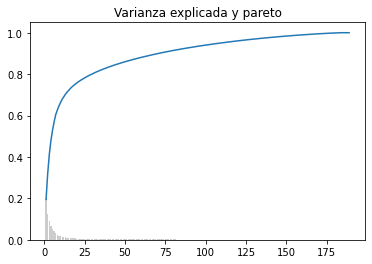

In [ ]:
for i in range(len(pca.components_)):
    print('% Var. explicada ('+str(i+1)+' componentes): ', np.cumsum(pca.explained_variance_ratio_)[i]*100)
    
plt.bar(range(1,len(pca.components_)+1),pca.explained_variance_ratio_, alpha=.2,color='0')
plt.plot(range(1,len(pca.components_)+1),np.cumsum(pca.explained_variance_ratio_),alpha=4)
plt.title("Varianza explicada y pareto")
plt.show()

In [ ]:
# Elegimos la componente adecuada: del grafico se observa que a partir de 40 componentes ya se explica el 86% de la data
cantidadComp = 100  # 70 ideal

colNames = []
for i in range(1,cantidadComp + 1):
  colNames.append("col_"+str(i))

pcaFin = PCA(n_components=cantidadComp)
pcaFin.fit(xscaled)

pd.DataFrame(pcaFin.components_).head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22175,22176,22177,22178,22179,22180,22181,22182,22183,22184,22185,22186,22187,22188,22189,22190,22191,22192,22193,22194,22195,22196,22197,22198,22199,22200,22201,22202,22203,22204,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214
0,-5.36e-03,5.88e-03,6.46e-03,1.33e-03,-3.26e-03,1.01e-02,4.81e-04,2.67e-03,8.15e-03,7.74e-03,4.24e-03,9.14e-03,8.70e-03,-6.46e-04,-7.06e-03,1.04e-02,-1.92e-03,6.94e-03,4.60e-03,1.91e-03,-6.93e-03,1.99e-03,5.54e-03,5.45e-03,-6.12e-03,2.11e-03,-8.41e-03,-8.73e-03,6.04e-03,3.22e-03,2.55e-03,-1.17e-02,-1.96e-03,-1.18e-03,-5.93e-03,-6.37e-03,-8.72e-03,-7.75e-03,2.08e-03,5.36e-03,...,-2.60e-03,-3.04e-04,6.89e-03,8.32e-03,3.85e-03,4.65e-03,-1.52e-03,-4.24e-03,-4.05e-03,-1.75e-03,7.48e-03,4.22e-03,1.87e-03,-3.84e-03,1.08e-03,2.03e-04,-1.36e-03,-1.60e-03,4.47e-03,3.41e-03,5.26e-04,-4.23e-03,-4.75e-03,-6.21e-03,-2.74e-03,-3.83e-05,4.76e-03,4.48e-03,8.47e-03,-4.07e-03,-2.79e-04,6.59e-03,-7.93e-03,-1.41e-03,4.50e-03,7.35e-03,-1.58e-03,7.64e-03,-5.33e-03,6.91e-04
1,-1.90e-03,-8.38e-03,5.78e-03,2.61e-03,2.27e-03,-1.70e-03,1.17e-03,-5.37e-03,-3.32e-03,4.60e-03,2.03e-03,1.77e-05,6.77e-03,3.54e-03,9.41e-03,-6.64e-03,1.27e-03,-3.57e-03,1.29e-02,2.31e-03,-2.63e-03,-8.45e-03,-1.02e-02,-1.30e-02,-1.33e-02,-1.51e-02,-4.30e-03,-7.97e-03,-9.31e-03,-1.55e-02,-1.46e-02,-8.80e-04,-1.17e-02,-1.38e-02,-1.34e-02,-1.28e-02,-9.45e-03,-9.85e-03,-1.29e-02,-7.49e-03,...,-5.08e-03,1.28e-03,9.71e-04,1.97e-03,4.35e-03,-6.04e-03,2.97e-03,-3.81e-03,1.10e-02,-6.48e-03,7.00e-03,-6.93e-03,-1.99e-03,6.52e-03,-6.21e-03,1.69e-03,1.36e-02,7.74e-03,9.76e-03,-3.63e-03,-2.49e-03,5.54e-03,-6.13e-03,2.09e-03,-3.10e-03,-3.08e-03,9.10e-03,9.14e-03,4.43e-03,8.07e-03,1.09e-03,1.70e-03,2.77e-03,4.31e-03,2.38e-03,-2.99e-03,-4.13e-03,1.61e-03,9.23e-03,-6.40e-05
2,-1.11e-02,-5.09e-03,3.63e-03,-3.89e-03,6.58e-03,2.53e-03,-2.18e-03,6.26e-03,-2.35e-03,1.06e-02,-1.46e-02,-9.34e-03,1.02e-02,-7.06e-03,-1.10e-02,4.03e-03,-2.28e-03,4.25e-03,-6.40e-03,9.43e-03,4.88e-03,-7.92e-03,-6.85e-03,-3.51e-03,-2.40e-03,-8.30e-03,9.04e-03,3.78e-03,-1.28e-03,8.13e-04,-6.42e-03,-7.98e-03,-1.91e-03,-3.85e-03,1.30e-03,-1.66e-03,-5.27e-03,-7.64e-03,-8.28e-03,4.35e-04,...,1.68e-03,9.08e-03,-1.49e-02,-1.15e-02,-9.90e-03,-1.10e-02,-1.23e-02,-1.69e-03,-1.31e-02,7.32e-04,-1.29e-02,2.34e-03,4.57e-03,-1.64e-02,-5.92e-03,4.15e-04,-1.12e-02,-1.38e-02,-1.07e-02,2.03e-03,-1.13e-02,-1.52e-02,-3.16e-03,-8.82e-03,6.35e-03,1.72e-03,-1.60e-03,-1.06e-02,1.23e-02,-9.79e-03,-5.57e-04,3.03e-03,-3.77e-03,-1.45e-02,3.22e-04,-9.60e-04,-1.12e-02,-1.05e-02,-1.88e-03,-1.03e-02
3,1.48e-02,-7.09e-03,1.78e-03,4.41e-03,8.69e-03,8.82e-03,2.87e-03,-1.92e-03,7.71e-03,-6.85e-03,-3.84e-03,4.49e-03,-6.11e-03,6.00e-03,-1.25e-03,5.65e-03,-1.35e-02,1.35e-03,-3.19e-03,-3.72e-03,-1.23e-02,6.43e-03,1.12e-03,2.62e-03,-1.37e-03,-3.33e-03,-1.49e-03,-2.84e-03,-1.30e-02,-8.07e-03,-6.57e-03,4.69e-03,-7.80e-03,-1.04e-02,3.36e-03,7.89e-03,-5.69e-03,-2.25e-03,4.86e-03,-4.49e-03,...,5.82e-04,-5.18e-03,5.63e-03,4.72e-03,1.37e-02,-7.74e-03,-9.15e-03,-6.45e-03,-3.15e-03,2.50e-03,-3.76e-03,-1.07e-02,-1.13e-02,6.70e-04,1.66e-02,-1.23e-02,1.17e-03,-1.11e-03,-4.43e-03,8.78e-03,2.37e-03,-1.67e-03,-8.22e-03,-9.07e-03,1.33e-02,-1.31e-02,-2.93e-04,-1.25e-03,-9.16e-04,1.29e-02,8.51e-03,7.50e-03,1.23e-03,-9.86e-04,-9.11e-03,-3.77e-03,-3.13e-03,7.63e-03,6.31e-03,-1.71e-02
4,-1.98e-03,-6.36e-03,8.77e-04,2.10e-02,-4.27e-03,4.43e-03,-4.64e-03,-1.14e-03,1.25e-02,-6.06e-03,-7.76e-03,-2.05e-03,-8.56e-03,1.27e-02,1.32e-03,6.29e-03,2.58e-03,-5.94e-03,3.98e-03,-6.17e-03,2.28e-03,4.23e-03,-3.19e-03,-2.20e-03,-2.97e-03,3.15e-03,-7.85e-03,3.42e-03,-5.28e-03,-2.60e-03,2.47e-03,2.59e-04,6.41e-03,3.50e-03,-5.82e-03,4.22e-03,9.40e-04,7.66e-03,3.22e-03,3.18e-03,...,-3.22e-03,3.25e-03,5.86e-03,1.10e-04,7.71e-03,-4.55e-03,1.40e-02,4.71e-03,7.64e-03,6.07e-03,8.66e-03,2.18e-03,1.27e-02,8.83e-03,-2.66e-03,7.98e-03,6.95e-03,1.35e-02,1.14e-02,3.57e-0

In [ ]:
xPca = pd.DataFrame(columns=colNames)
xPca[colNames]=pd.DataFrame(pcaFin.transform(xscaled),columns=colNames)

#xtestPca = pd.DataFrame(columns=colNames)
#xtestPca[colNames]=pd.DataFrame(pcaFin.transform(xscaledtest),columns=colNames)
                                
xPca[colNames].head(2)

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,...,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100
0,4.99,-70.91,26.74,36.67,36.46,17.97,-35.54,11.25,-1.61,-20.80,-40.10,25.92,-5.46,1.97,-0.22,-8.60,-23.19,5.29,16.01,0.60,12.77,-4.53,-8.92,0.04,-12.42,-11.34,4.15,-5.54,-4.48,-9.53,11.34,0.84,-14.86,-18.28,-1.33,5.86,2.21,-6.67,-6.07,2.07,...,7.16,6.11,-9.67,-1.21,2.95,2.11,2.77,-10.95,-0.43,-0.68,10.82,-1.09,-1.84,-3.51,0.14,-3.55,4.92,0.21,6.46,5.39,-11.81,2.25,2.53,-0.54,0.56,2.56,-2.43,-6.29,4.45,-9.36,-1.42,-0.95,5.03,-6.97,-2.93,-2.86,6.31,-2.29,10.10,4.84
1,23.06,-72.90,17.80,23.51,29.56,18.29,-24.67,41.52,-3.76,-20.08,9.36,-20.83,8.54,29.85,-0.29,-14.27,-16.91,-16.68,12.58,5.66,6.44,-13.83,-15.71,-1.75,-21.05,-8.95,6.01,11.32,-11.52,-11.31,10.11,18.03,-16.50,-24.47,-5.38,16.68,-4.34,-6.73,5.67,-22.71,...,2.30,4.77,-5.55,4.66,-13.71,4.76,11.72,-6.26,13.57,0.69,-1.20,3.58,9.53,2.62,-4.55,-1.27,2.76,-5.84,0.86,-8.95,-6.68,-1.40,5.63,1.13,-5.06,-9.74,2.64,-11.84,-1.61,3.54,0.22,0.87,-14.06,11.06,-1.00,11.33,4.18,-0.94,-8.65,-5.45


In [ ]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=2, min_samples=2).fit(xPca)
clustering.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  1,  2,  3,  0,  2,  3,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1], dtype=int64)

In [ ]:
## LDA 

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=7, random_state=0).fit(dftarray)
results = kmeans.labels_


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0,
       3, 3, 1, 4, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       4, 4, 4, 4, 1, 1, 1, 6, 6, 6, 6, 6, 6])

In [ ]:
dft["labels"] = list(results)

In [ ]:
dft

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22176,22177,22178,22179,22180,22181,22182,22183,22184,22185,22186,22187,22188,22189,22190,22191,22192,22193,22194,22195,22196,22197,22198,22199,22200,22201,22202,22203,22204,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214,labels
1_kidney,10.19,6.04,7.45,12.03,5.27,8.54,6.92,5.72,8.08,5.43,7.04,8.85,7.60,11.25,10.29,8.89,6.37,5.58,10.14,5.96,9.74,11.05,12.28,12.85,12.30,11.34,12.00,12.27,7.61,11.54,12.26,10.40,13.23,12.69,10.90,11.94,13.03,12.64,13.09,12.72,...,6.24,8.61,9.02,8.27,7.32,8.79,6.54,10.56,6.88,9.97,8.02,5.36,9.03,8.11,4.55,10.00,10.68,6.89,7.39,7.77,8.96,6.65,7.94,8.41,4.86,8.53,8.15,7.46,9.82,8.11,5.25,7.10,8.21,7.74,6.43,5.70,9.21,8.34,7.37,3
2_kidney,10.51,6.70,7.78,12.01,5.18,8.59,6.96,5.60,7.57,5.28,7.05,8.50,7.47,10.86,10.45,9.66,6.50,5.49,10.26,6.53,10.19,11.95,12.78,13.39,12.05,10.99,11.79,11.63,9.37,11.74,12.50,10.38,13.02,12.98,10.83,11.76,12.79,12.48,13.03,12.35,...,6.42,8.05,9.15,8.17,8.04,8.90,6.46,11.01,6.97,10.18,9.21,5.36,8.99,8.55,4.74,10.15,10.65,7.07,7.14,7.99,8.69,6.76,8.24,8.80,5.01,9.23,8.15,7.93,10.18,8.07,5.41,6.91,8.32,8.19,7.68,6.57,9.42,8.21,7.92,3
3_kidney,10.27,6.14,7.70,11.63,5.30,8.28,7.05,5.58,7.14,5.28,7.33,9.29,7.87,11.03,10.45,8.63,6.42,5.62,10.67,6.78,10.01,11.63,12.15,12.20,12.21,10.62,11.91,12.36,9.62,11.51,12.29,10.38,13.25,12.52,10.51,11.28,12.90,12.67,12.94,12.21,...,5.90,9.22,9.13,8.62,6.64,9.25,6.33,10.93,6.50,10.22,8.03,5.29,9.28,6.75,4.61,10.38,10.80,7.20,7.39,7.48,8.67,6.31,7.49,7.91,5.08,9.19,8.55,8.18,10.26,7.81,5.30,6.72,8.40,7.96,6.42,5.64,8.19,8.46,7.60,3
4_kidney,10.25,6.58,8.48,11.08,5.37,8.60,7.12,5.86,8.61,5.38,7.57,9.02,7.89,11.24,10.46,10.02,6.74,5.53,10.46,6.39,10.34,11.32,12.79,12.87,12.01,11.03,11.57,12.30,9.99,11.89,12.64,9.77,13.40,12.85,11.02,11.75,13.03,12.64,13.16,12.88,...,6.12,9.21,9.55,8.66,7.30,9.57,6.12,11.06,6.25,10.31,8.51,5.40,9.49,6.80,4.65,10.80,11.07,7.89,7.29,7.92,9.30,6.26,7.75,8.99,5.03,9.22,9.17,9.62,10.01,8.04,6.03,6.72,8.80,8.33,6.35,5.75,8.52,8.56,7.80,3
5_kidney,10.16,6.61,8.12,10.83,5.33,8.30,7.08,5.73,8.97,5.48,7.26,8.86,7.79,10.97,10.26,9.63,6.63,5.44,10.25,6.33,9.83,11.19,12.69,12.65,11.97,10.99,11.75,12.06,9.07,11.89,12.72,10.00,13.47,12.96,10.93,11.46,12.99,12.60,13.20,12.73,...,6.09,8.93,9.94,8.43,7.63,9.03,6.43,10.94,6.45,9.97,8.02,5.33,9.30,6.84,4.57,10.54,10.96,7.73,7.07,7.78,8.96,6.44,7.83,8.71,4.97,8.96,8.32,9.43,9.95,8.21,5.61,6.58,8.58,8.06,6.44,6.05,7.97,8.42,7.54,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185_placenta,9.80,6.06,7.49,9.91,5.31,7.42,6.91,5.78,6.55,5.44,6.91,8.26,7.53,9.44,10.13,8.61,6.19,5.22,9.54,5.46,9.05,9.25,12.28,11.61,12.73,11.20,11.82,12.02,10.77,12.19,12.66,10.02,13.10,12.62,11.37,11.82,12.97,12.36,13.21,12.22,...,6.21,8.16,8.85,7.47,7.18,8.95,6.32,10.77,6.32,9.52,7.00,5.45,9.20,5.81,4.57,9.75,10.40,7.11,7.05,7.74,8.96,6.52,8.18,5.95,5.22,8.70,8.28,6.92,9.87,7.10,5.36,7.10,7.97,6.79,6.22,7.33,8.45,8.34,7.66,6
186_placenta,10.51,6.35,7.47,9.91,5.34,7.90,6.98,6.00,6.78,5.37,9.38,9.22,7.64,9.84,11.68,8.66,6.80,5.37,10.26,6.91,10.32,11.29,12.17,12.35,12.60,10.81,11.28,11.87,10.45,11.74,12.32,10.85,12.98,12.15,10.86,11.40,12.83,12.32,13.13,11.75,...,6.06,8.79,9.24,7.47,7.05,8.59,6.15,11.03,6.24,9.85,8.76,5.43,9.17,6.19,4.60,10.00,10.64,7.18,6.90,7.83,9.09,6.65,7.47,5.87,5.02,8.74,8.72,6.93,10.42,7.06,5.43,7.05,7.16,7.92,6.42,10.26,9.30,8.26,8.07,6
187_placenta,9.98,6.72,7.12,9.41,4.90,8.12,6.81,5.97,6.58,5.42,10.23,9.57,7.52,9.37,9.91,8.89,6.75,5.78,9.98,9.40,10.86,10.70,12.51,13.24,12.18,11.13,11.62,11.65,10.77,11.88,12.42,10.20,13.06,12.80,10.98,11.80,12.61,12.11,13.20,12.63,...,6.72,8.04,9.

In [ ]:
dft["original"] = dft.index

In [ ]:
dft

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22177,22178,22179,22180,22181,22182,22183,22184,22185,22186,22187,22188,22189,22190,22191,22192,22193,22194,22195,22196,22197,22198,22199,22200,22201,22202,22203,22204,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214,labels,original
1_kidney,10.19,6.04,7.45,12.03,5.27,8.54,6.92,5.72,8.08,5.43,7.04,8.85,7.60,11.25,10.29,8.89,6.37,5.58,10.14,5.96,9.74,11.05,12.28,12.85,12.30,11.34,12.00,12.27,7.61,11.54,12.26,10.40,13.23,12.69,10.90,11.94,13.03,12.64,13.09,12.72,...,8.61,9.02,8.27,7.32,8.79,6.54,10.56,6.88,9.97,8.02,5.36,9.03,8.11,4.55,10.00,10.68,6.89,7.39,7.77,8.96,6.65,7.94,8.41,4.86,8.53,8.15,7.46,9.82,8.11,5.25,7.10,8.21,7.74,6.43,5.70,9.21,8.34,7.37,3,1_kidney
2_kidney,10.51,6.70,7.78,12.01,5.18,8.59,6.96,5.60,7.57,5.28,7.05,8.50,7.47,10.86,10.45,9.66,6.50,5.49,10.26,6.53,10.19,11.95,12.78,13.39,12.05,10.99,11.79,11.63,9.37,11.74,12.50,10.38,13.02,12.98,10.83,11.76,12.79,12.48,13.03,12.35,...,8.05,9.15,8.17,8.04,8.90,6.46,11.01,6.97,10.18,9.21,5.36,8.99,8.55,4.74,10.15,10.65,7.07,7.14,7.99,8.69,6.76,8.24,8.80,5.01,9.23,8.15,7.93,10.18,8.07,5.41,6.91,8.32,8.19,7.68,6.57,9.42,8.21,7.92,3,2_kidney
3_kidney,10.27,6.14,7.70,11.63,5.30,8.28,7.05,5.58,7.14,5.28,7.33,9.29,7.87,11.03,10.45,8.63,6.42,5.62,10.67,6.78,10.01,11.63,12.15,12.20,12.21,10.62,11.91,12.36,9.62,11.51,12.29,10.38,13.25,12.52,10.51,11.28,12.90,12.67,12.94,12.21,...,9.22,9.13,8.62,6.64,9.25,6.33,10.93,6.50,10.22,8.03,5.29,9.28,6.75,4.61,10.38,10.80,7.20,7.39,7.48,8.67,6.31,7.49,7.91,5.08,9.19,8.55,8.18,10.26,7.81,5.30,6.72,8.40,7.96,6.42,5.64,8.19,8.46,7.60,3,3_kidney
4_kidney,10.25,6.58,8.48,11.08,5.37,8.60,7.12,5.86,8.61,5.38,7.57,9.02,7.89,11.24,10.46,10.02,6.74,5.53,10.46,6.39,10.34,11.32,12.79,12.87,12.01,11.03,11.57,12.30,9.99,11.89,12.64,9.77,13.40,12.85,11.02,11.75,13.03,12.64,13.16,12.88,...,9.21,9.55,8.66,7.30,9.57,6.12,11.06,6.25,10.31,8.51,5.40,9.49,6.80,4.65,10.80,11.07,7.89,7.29,7.92,9.30,6.26,7.75,8.99,5.03,9.22,9.17,9.62,10.01,8.04,6.03,6.72,8.80,8.33,6.35,5.75,8.52,8.56,7.80,3,4_kidney
5_kidney,10.16,6.61,8.12,10.83,5.33,8.30,7.08,5.73,8.97,5.48,7.26,8.86,7.79,10.97,10.26,9.63,6.63,5.44,10.25,6.33,9.83,11.19,12.69,12.65,11.97,10.99,11.75,12.06,9.07,11.89,12.72,10.00,13.47,12.96,10.93,11.46,12.99,12.60,13.20,12.73,...,8.93,9.94,8.43,7.63,9.03,6.43,10.94,6.45,9.97,8.02,5.33,9.30,6.84,4.57,10.54,10.96,7.73,7.07,7.78,8.96,6.44,7.83,8.71,4.97,8.96,8.32,9.43,9.95,8.21,5.61,6.58,8.58,8.06,6.44,6.05,7.97,8.42,7.54,3,5_kidney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185_placenta,9.80,6.06,7.49,9.91,5.31,7.42,6.91,5.78,6.55,5.44,6.91,8.26,7.53,9.44,10.13,8.61,6.19,5.22,9.54,5.46,9.05,9.25,12.28,11.61,12.73,11.20,11.82,12.02,10.77,12.19,12.66,10.02,13.10,12.62,11.37,11.82,12.97,12.36,13.21,12.22,...,8.16,8.85,7.47,7.18,8.95,6.32,10.77,6.32,9.52,7.00,5.45,9.20,5.81,4.57,9.75,10.40,7.11,7.05,7.74,8.96,6.52,8.18,5.95,5.22,8.70,8.28,6.92,9.87,7.10,5.36,7.10,7.97,6.79,6.22,7.33,8.45,8.34,7.66,6,185_placenta
186_placenta,10.51,6.35,7.47,9.91,5.34,7.90,6.98,6.00,6.78,5.37,9.38,9.22,7.64,9.84,11.68,8.66,6.80,5.37,10.26,6.91,10.32,11.29,12.17,12.35,12.60,10.81,11.28,11.87,10.45,11.74,12.32,10.85,12.98,12.15,10.86,11.40,12.83,12.32,13.13,11.75,...,8.79,9.24,7.47,7.05,8.59,6.15,11.03,6.24,9.85,8.76,5.43,9.17,6.19,4.60,10.00,10.64,7.18,6.90,7.83,9.09,6.65,7.47,5.87,5.02,8.74,8.72,6.93,10.42,7.06,5.43,7.05,7.16,7.92,6.42,10.26,9.30,8.26,8.07,6,186_placenta
187_placenta,9.98,6.72,7.12,9.41,4.90,8.12,6.81,5.97,6.58,5.42,10.23,9.57,7.52,9.37,9.91,8.89,6.75,5.78,9.98,9.40,10.86,10.70,12.51,13.24,12.18,11.13,11.62,11.65,10.77,11.88,12.42,10.20,13.06,12.80,10.98,11.80,1

In [ ]:
def getname(x):
    res = x.split("_")
    return res[1]

In [ ]:
dft["label_final"] = dft["original"].apply(lambda x:getname(x))

In [ ]:
dft

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22178,22179,22180,22181,22182,22183,22184,22185,22186,22187,22188,22189,22190,22191,22192,22193,22194,22195,22196,22197,22198,22199,22200,22201,22202,22203,22204,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214,labels,original,label_final
1_kidney,10.19,6.04,7.45,12.03,5.27,8.54,6.92,5.72,8.08,5.43,7.04,8.85,7.60,11.25,10.29,8.89,6.37,5.58,10.14,5.96,9.74,11.05,12.28,12.85,12.30,11.34,12.00,12.27,7.61,11.54,12.26,10.40,13.23,12.69,10.90,11.94,13.03,12.64,13.09,12.72,...,9.02,8.27,7.32,8.79,6.54,10.56,6.88,9.97,8.02,5.36,9.03,8.11,4.55,10.00,10.68,6.89,7.39,7.77,8.96,6.65,7.94,8.41,4.86,8.53,8.15,7.46,9.82,8.11,5.25,7.10,8.21,7.74,6.43,5.70,9.21,8.34,7.37,3,1_kidney,kidney
2_kidney,10.51,6.70,7.78,12.01,5.18,8.59,6.96,5.60,7.57,5.28,7.05,8.50,7.47,10.86,10.45,9.66,6.50,5.49,10.26,6.53,10.19,11.95,12.78,13.39,12.05,10.99,11.79,11.63,9.37,11.74,12.50,10.38,13.02,12.98,10.83,11.76,12.79,12.48,13.03,12.35,...,9.15,8.17,8.04,8.90,6.46,11.01,6.97,10.18,9.21,5.36,8.99,8.55,4.74,10.15,10.65,7.07,7.14,7.99,8.69,6.76,8.24,8.80,5.01,9.23,8.15,7.93,10.18,8.07,5.41,6.91,8.32,8.19,7.68,6.57,9.42,8.21,7.92,3,2_kidney,kidney
3_kidney,10.27,6.14,7.70,11.63,5.30,8.28,7.05,5.58,7.14,5.28,7.33,9.29,7.87,11.03,10.45,8.63,6.42,5.62,10.67,6.78,10.01,11.63,12.15,12.20,12.21,10.62,11.91,12.36,9.62,11.51,12.29,10.38,13.25,12.52,10.51,11.28,12.90,12.67,12.94,12.21,...,9.13,8.62,6.64,9.25,6.33,10.93,6.50,10.22,8.03,5.29,9.28,6.75,4.61,10.38,10.80,7.20,7.39,7.48,8.67,6.31,7.49,7.91,5.08,9.19,8.55,8.18,10.26,7.81,5.30,6.72,8.40,7.96,6.42,5.64,8.19,8.46,7.60,3,3_kidney,kidney
4_kidney,10.25,6.58,8.48,11.08,5.37,8.60,7.12,5.86,8.61,5.38,7.57,9.02,7.89,11.24,10.46,10.02,6.74,5.53,10.46,6.39,10.34,11.32,12.79,12.87,12.01,11.03,11.57,12.30,9.99,11.89,12.64,9.77,13.40,12.85,11.02,11.75,13.03,12.64,13.16,12.88,...,9.55,8.66,7.30,9.57,6.12,11.06,6.25,10.31,8.51,5.40,9.49,6.80,4.65,10.80,11.07,7.89,7.29,7.92,9.30,6.26,7.75,8.99,5.03,9.22,9.17,9.62,10.01,8.04,6.03,6.72,8.80,8.33,6.35,5.75,8.52,8.56,7.80,3,4_kidney,kidney
5_kidney,10.16,6.61,8.12,10.83,5.33,8.30,7.08,5.73,8.97,5.48,7.26,8.86,7.79,10.97,10.26,9.63,6.63,5.44,10.25,6.33,9.83,11.19,12.69,12.65,11.97,10.99,11.75,12.06,9.07,11.89,12.72,10.00,13.47,12.96,10.93,11.46,12.99,12.60,13.20,12.73,...,9.94,8.43,7.63,9.03,6.43,10.94,6.45,9.97,8.02,5.33,9.30,6.84,4.57,10.54,10.96,7.73,7.07,7.78,8.96,6.44,7.83,8.71,4.97,8.96,8.32,9.43,9.95,8.21,5.61,6.58,8.58,8.06,6.44,6.05,7.97,8.42,7.54,3,5_kidney,kidney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185_placenta,9.80,6.06,7.49,9.91,5.31,7.42,6.91,5.78,6.55,5.44,6.91,8.26,7.53,9.44,10.13,8.61,6.19,5.22,9.54,5.46,9.05,9.25,12.28,11.61,12.73,11.20,11.82,12.02,10.77,12.19,12.66,10.02,13.10,12.62,11.37,11.82,12.97,12.36,13.21,12.22,...,8.85,7.47,7.18,8.95,6.32,10.77,6.32,9.52,7.00,5.45,9.20,5.81,4.57,9.75,10.40,7.11,7.05,7.74,8.96,6.52,8.18,5.95,5.22,8.70,8.28,6.92,9.87,7.10,5.36,7.10,7.97,6.79,6.22,7.33,8.45,8.34,7.66,6,185_placenta,placenta
186_placenta,10.51,6.35,7.47,9.91,5.34,7.90,6.98,6.00,6.78,5.37,9.38,9.22,7.64,9.84,11.68,8.66,6.80,5.37,10.26,6.91,10.32,11.29,12.17,12.35,12.60,10.81,11.28,11.87,10.45,11.74,12.32,10.85,12.98,12.15,10.86,11.40,12.83,12.32,13.13,11.75,...,9.24,7.47,7.05,8.59,6.15,11.03,6.24,9.85,8.76,5.43,9.17,6.19,4.60,10.00,10.64,7.18,6.90,7.83,9.09,6.65,7.47,5.87,5.02,8.74,8.72,6.93,10.42,7.06,5.43,7.05,7.16,7.92,6.42,10.26,9.30,8.26,8.07,6,186_placenta,placenta
187_placenta,9.98,6.72,7.12,9.41,4.90,8.12,6.81,5.97,6.58,5.42,10.23,9.57,7.52,9.37,9.91,8.89,6.75,5.78,9.98,9.40,10.86,10.70,12.51,13.24,12.18,11.13,11.62,11.65,10.77,11.88,12.42,10.20,1

In [ ]:
dft.loc[:,["labels","label_final"]].groupby(["labels","label_final"])["labels","label_final"].count()

<ipython-input-178-5fd613afa35a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dft.loc[:,["labels","label_final"]].groupby(["labels","label_final"])["labels","label_final"].count()


labels  label_final
labels label_final                     
0      kidney            2            2
       liver            26           26
1      cerebellum       33           33
2      endometrium      15           15
3      kidney           37           37
4      cerebellum        5            5
       hippocampus      31           31
5      colon            34           34
6      placenta          6            6

In [ ]:
dft.loc[:,["labels","label_final"]].drop_duplicates()

,labels,label_final
1_kidney,3,kidney
17_hippocampus,4,hippocampus
47_cerebellum,1,cerebellum
87_colon,5,colon
124_liver,0,liver
147_kidney,0,kidney
149_endometrium,2,endometrium
176_cerebellum,4,cerebellum
184_placenta,6,placenta


In [ ]:
results = kmeans.labels_

In [ ]:
dfres = pd.DataFrame(data = results, columns = ["valores"])
dfres["cua"] = 0
dfres

,valores,cua
0,3,0
1,3,0
2,3,0
3,3,0
4,3,0
...,...,...
184,6,0
185,6,0
186,6,0
187,6,0


In [ ]:
dfres.valores.value_counts()

3    37
4    36
5    34
1    33
0    28
2    15
6     6
Name: valores, dtype: int64

In [ ]:
dfres.valores.value_counts()

3    37
4    36
5    34
1    33
0    28
2    15
6     6
Name: valores, dtype: int64

In [ ]:
dfclases.x.value_counts()

kidney         39
cerebellum     38
colon          34
hippocampus    31
liver          26
endometrium    15
placenta        6
Name: x, dtype: int64

In [ ]:
results.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [ ]:
dictvalues = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}
for i in results:
    if i == 0:
        dictvalues
    